<a href="https://colab.research.google.com/github/sebekpro/python-krakowiak/blob/main/250-data-science-bootcamp-w-jezyku-python/131_140_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 131](#1)
* [Ćwiczenie 132](#2)
* [Ćwiczenie 133](#3)
* [Ćwiczenie 134](#4)
* [Ćwiczenie 135](#5)
* [Ćwiczenie 136](#6)
* [Ćwiczenie 137](#7)
* [Ćwiczenie 138](#8)
* [Ćwiczenie 139](#9)
* [Ćwiczenie 140](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

np.__version__
sns.set()

### <a name='1'></a> Ćwiczenie 131
Wczytaj plik csv do obiektu DataFrame o nazwie _df_raw_ z domyślnymi parametrami funkcji _pd.read_csv()_ i wyświetl 5 pierwszych wierszy.   
Adres url do pliku:
* https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv


In [3]:
# tutaj wpisz rozwiązanie
url = 'https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/kaggle+/churn_modelling/Telco-Customer-Churn.csv'
df_raw = pd.read_csv(url)
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Skopiuj obiekt _df_raw_ do zmiennej _df_.

In [4]:
# tutaj wpisz rozwiązanie
df = df_raw.copy()

Wyświetl podstawowe informacje na temat obiektu _df_.

In [5]:
# tutaj wpisz rozwiązanie
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Wyznacz liczbę brakujących elementów (_np.nan_) w obiekcie _df_ dla każdej zmiennej.

In [ ]:
# tutaj wpisz rozwiązanie
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


### <a name='2'></a> Ćwiczenie 132
Zwróć uwagę na kolumnę _TotalCharges_. Typ tej kolumny to _object_. Spróbuj odgadnąć dlaczego tak się stało.

__Wskazówka:__
Spójrz na rozkład wartości zmiennej.

In [6]:
# tutaj wpisz rozwiązanie
# Kolumna TotalCharges została wczytana jako typ object, ponieważ oprócz poprawnych liczb (np. 29.85, 1889.5, 108.15)
# zawiera także inne wartości, które nie są liczbami – najczęściej puste ciągi znaków lub spacje.
df['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1


Zauważ, że na drugim miejscu mamy 11 wartości pustych. Aby lepiej to zobaczyć, patrz poniżej.

In [7]:
df['TotalCharges'].value_counts()[:3].index

Index([' ', '20.2', '19.75'], dtype='object', name='TotalCharges')

Jest to znak spacji, który wkradł się w nasze dane. Spowodował, że pandas odczytał całą kolumnę jako tekst. Jako analityk musimy z takimi problemami sobie dawać radę. Spróbuj zamienić brakujące wartości kolumny _TotalCharges_ na jej medianę.

In [12]:
from re import T
# Obliczenie mediany dla kolumny TotalCharges
# tutaj wpisz rozwiązanie
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
median_total = df['TotalCharges'].median()
print(median_total)

# Rozwiązanie autora
TotalChargesMedian = df['TotalCharges'][df['TotalCharges'] != ' '].median()
print('\n', TotalChargesMedian)

# Wypełnienie brakujących wartości medianą
# tutaj wpisz rozwiązanie
df['TotalCharges'] = df['TotalCharges'].fillna(median_total)

# Rozwiązanie autora
df.loc[df['TotalCharges'] == ' ', 'TotalCharges'] = TotalChargesMedian

# Konwersja kolumny TotalCharges do typu float
# tutaj wpisz rozwiązanie
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges']

1397.475

 1397.475


,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


Sprawdź, czy typ został poprawnie zmieniony.

In [13]:
# tutaj wpisz rozwiązanie
print(df['TotalCharges'].dtype)
df.info()

float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   

In [14]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### <a name='3'></a> Ćwiczenie 133
Kolumny z poniższej listy _categorical_ przekształć do typu _category_.

In [15]:
categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
               'StreamingTV', 'Contract', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod', 'Churn']

# tutaj wpisz rozwiązanie
df2 = df.copy()
df3 = df.copy()
for col in categorical:
  df2[col] = df2[col].astype('category')

# Rozwiązanie autora
df3.info()
for col in categorical:
  df3[col] = pd.Categorical(df3[col])

df2.info()
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Kolumny z poniższej listy _numerical_ przekształć do typu _float_.

In [18]:
numerical = ['tenure', 'MonthlyCharges']

# tutaj wpisz rozwiązanie
df2[numerical] = df2[numerical].astype('float')
df2.info()

# Rozwiązanie autora
for col in numerical:
  df3[col] = df3[col].astype(float)

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

Ustaw kolumnę _customerID_ jako indeks obiektu _df_ oraz wyświetl info o obiekcie _df_.

In [ ]:
# tutaj wpisz rozwiązanie
df2.set_index('customerID', inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   category
 3   Dependents        7043 non-null   category
 4   tenure            7043 non-null   float64 
 5   PhoneService      7043 non-null   category
 6   MultipleLines     7043 non-null   category
 7   InternetService   7043 non-null   category
 8   OnlineSecurity    7043 non-null   category
 9   OnlineBackup      7043 non-null   category
 10  DeviceProtection  7043 non-null   category
 11  TechSupport       7043 non-null   category
 12  StreamingTV       7043 non-null   category
 13  StreamingMovies   7043 non-null   category
 14  Contract          7043 non-null   category
 15  PaperlessBilling  7043 non-null   category
 16  PaymentMethod 

### <a name='4'></a> Ćwiczenie 134
Użyj meteody _describe()_ do wyświetlenia podstawowych statystyk obiektu _df_.

In [ ]:
# tutaj wpisz rozwiązanie
df2.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Zauważ, że są to tylko zmienne numeryczne. Wyświetl podstawowe statystyki zmiennych kategorycznych przekazując odpowiedni parametr _include_ metody _describe()_.

In [ ]:
# tutaj wpisz rozwiązanie
df2.describe(include='category')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


Zauważ, że są to nieco inne statystyki niż dla zmiennych numerycznych.

### <a name='5'></a> Ćwiczenie 135
Znajdź rozkład wartości zmiennej _Churn_.

In [21]:
# tutaj wpisz rozwiązanie
churn_counts = df2['Churn'].value_counts()
print(churn_counts)


Churn
No     5174
Yes    1869
Name: count, dtype: int64


Zbuduj wykres kołowy rozkładu wartości zmiennej _Churn_.

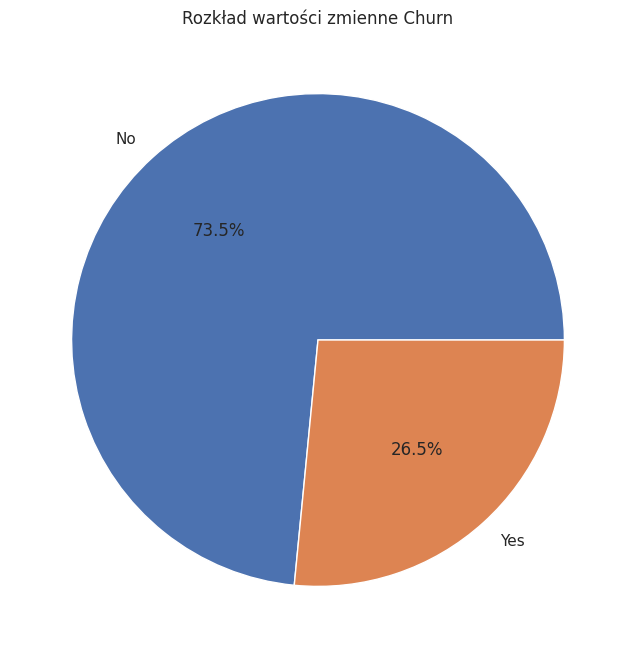

<Axes: ylabel='count'>

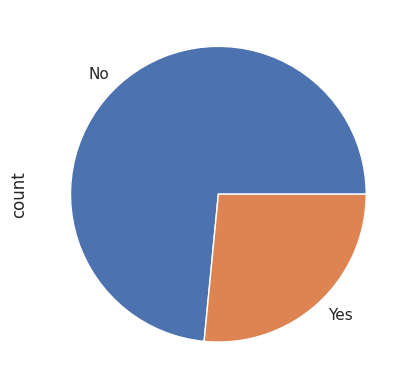

In [22]:
# tutaj wpisz rozwiązanie
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))
plt.pie(churn_counts, labels = churn_counts.index, autopct = '%1.1f%%')
plt.title('Rozkład wartości zmienne Churn')
plt.show()

# Rozwiązanie autora
df3['Churn'].value_counts().plot(kind = 'pie')

### <a name='6'></a> Ćwiczenie 136
Zbuduj wykres _pairplot()_ z biblioteki _seaborn_. Przekaż zmienne:
* tenure
* MonthlyCharges
* TotalCharges  


oraz parametr: _hue='Churn'_.

__Wskazówka:__
https://seaborn.pydata.org/generated/seaborn.pairplot.html


Text(0.5, 1.02, 'Pairplot: tenure, MonthlyCharges, TotalCharges (hue = Churn)')

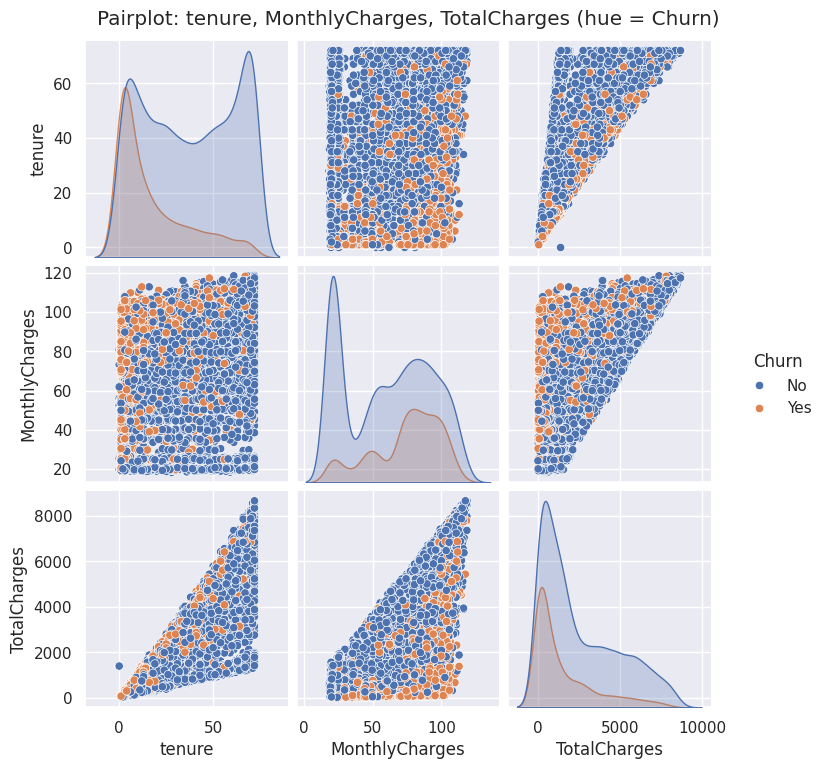

In [ ]:
# tutaj wpisz rozwiązanie
sub_df = df2[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
sns.pairplot(sub_df, hue = 'Churn')
plt.suptitle('Pairplot: tenure, MonthlyCharges, TotalCharges (hue = Churn)', y = 1.02)

### <a name='7'></a> Ćwiczenie 137
Dokonaj mapowania kolumny _Churn_ odpowiednio:
* 'Yes' -> 1
* 'No' -> 0

Wyświetl 5 pierwszych wierszy obiektu _df_.

In [23]:
# tutaj wpisz rozwiązanie
df2['Churn'] = df2['Churn'].map({'Yes': 1, 'No': 0})
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### <a name='8'></a> Ćwiczenie 138
Wyznacz macierz korelacji dla obiektu _df_.

In [ ]:
# tutaj wpisz rozwiązanie
numeric_df = df2.select_dtypes(include = 'number')
cor_matrix = numeric_df.corr()
cor_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825464
MonthlyCharges,0.247900,1.000000,0.650864
TotalCharges,0.825464,0.650864,1.000000


### <a name='9'></a> Ćwiczenie 139
Znajdź rozkład zmiennej _PaymentMethod_.

In [ ]:
# tutaj wpisz rozwiązanie
payment_method_counts = df2['PaymentMethod'].value_counts()
print(payment_method_counts)

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


Pogrupuj dane po zmiennej _PaymentMethod_ i policz średnią wartość dla zmiennej _TotalCharges_.

In [ ]:
# tutaj wpisz rozwiązanie
mean_totalcharges_payment = df2.groupby('PaymentMethod')['TotalCharges'].mean()
print(mean_totalcharges_payment)

PaymentMethod
Bank transfer (automatic)    3077.121017
Credit card (automatic)      3070.296206
Electronic check             2090.868182
Mailed check                 1056.186104
Name: TotalCharges, dtype: float64


<ipython-input-65-db80c86c389d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_totalcharges_payment = df2.groupby('PaymentMethod')['TotalCharges'].mean()


### <a name='10'></a> Ćwiczenie 140
Pobierz próbkę 10-ciu wierszy z obiektu _df_ i zapisz do pliku _sample_10.csv_.

In [ ]:
# tutaj wpisz rozwiązanie
df_10_records = df2.sample(n = 10)
df_10_records.to_csv('sample_10.csv')

Uruchom poniższą komórkę w celu sprawdzenia.

In [ ]:
!cat sample_10.csv

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2342-CKIAO,Female,0,No,No,2.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.3,41.2,0
5198-HQAEN,Male,0,Yes,Yes,35.0,Yes,No,Fiber optic,No,Yes,No,Yes,Yes,No,One year,Yes,Electronic check,89.7,3165.6,0
7225-IILWY,Male,0,Yes,Yes,68.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1686.15,0
1304-NECVQ,Female,1,No,No,2.0,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,78.55,149.55,1
9505-SQFSW,Female,0,Yes,Yes,3.0,No,No phone service,DSL,No,Yes,No,No,No,Yes,Month-to-month,No,Maile